In [68]:
import cv2
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (100, 20)

In [179]:
img = cv2.imread('cut/01-02.0000007.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 10, 250, apertureSize=7)

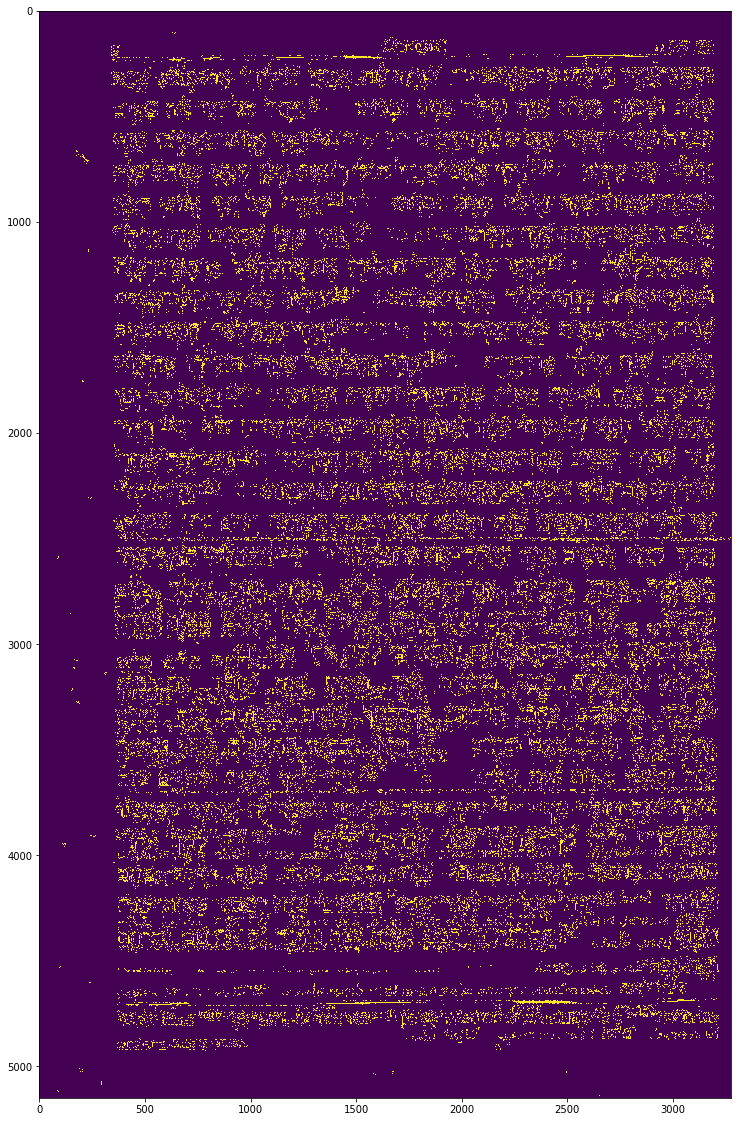

In [180]:
edges
plt.imshow(edges)
plt.show()

In [181]:
lines = cv2.HoughLines(edges,1,np.pi/180, 700)

In [182]:
lines[0]

array([[2.5030000e+03, 1.5707964e+00]], dtype=float32)

In [183]:
maxlength = img.shape[:2][1]
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + maxlength*(-b))
        y1 = int(y0 + maxlength*(a))
        x2 = int(x0 - maxlength*(-b))
        y2 = int(y0 - maxlength*(a))
        #print(x1, y1, x2, y2)

        cv2.line(img,(x1,y1),(x2,y2),(0,0,255), 2)

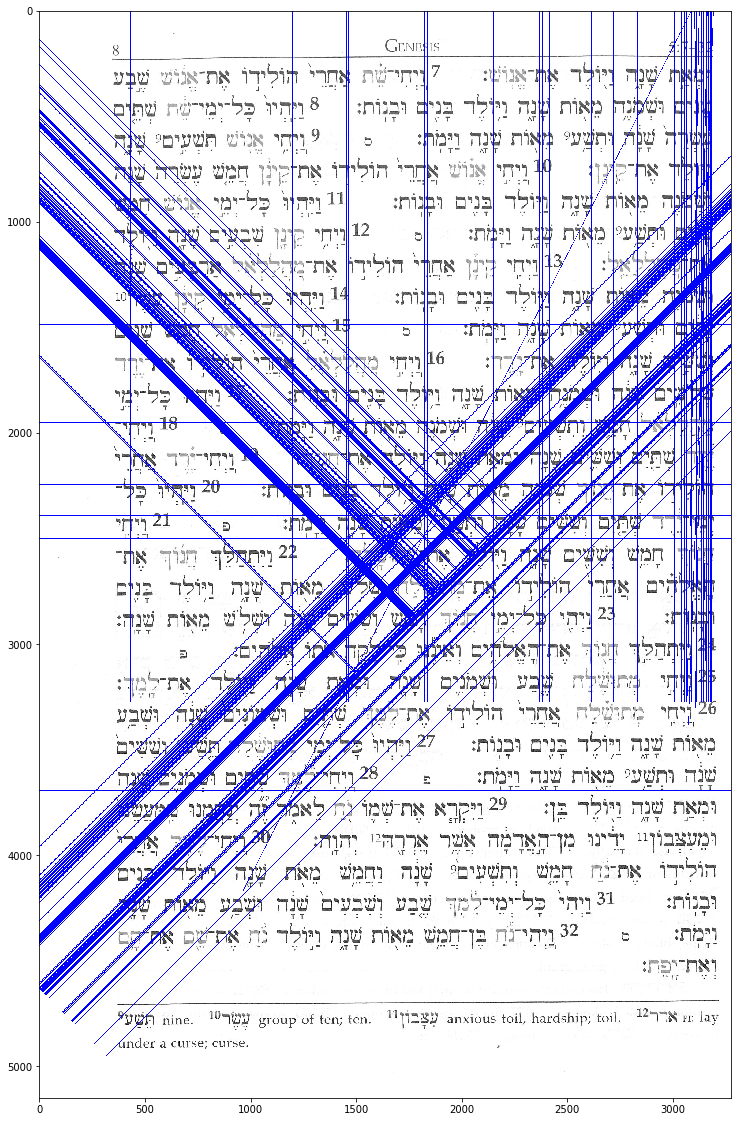

In [184]:
#cv2.imwrite('img.jpg',img)
plt.imshow(img)
plt.show()

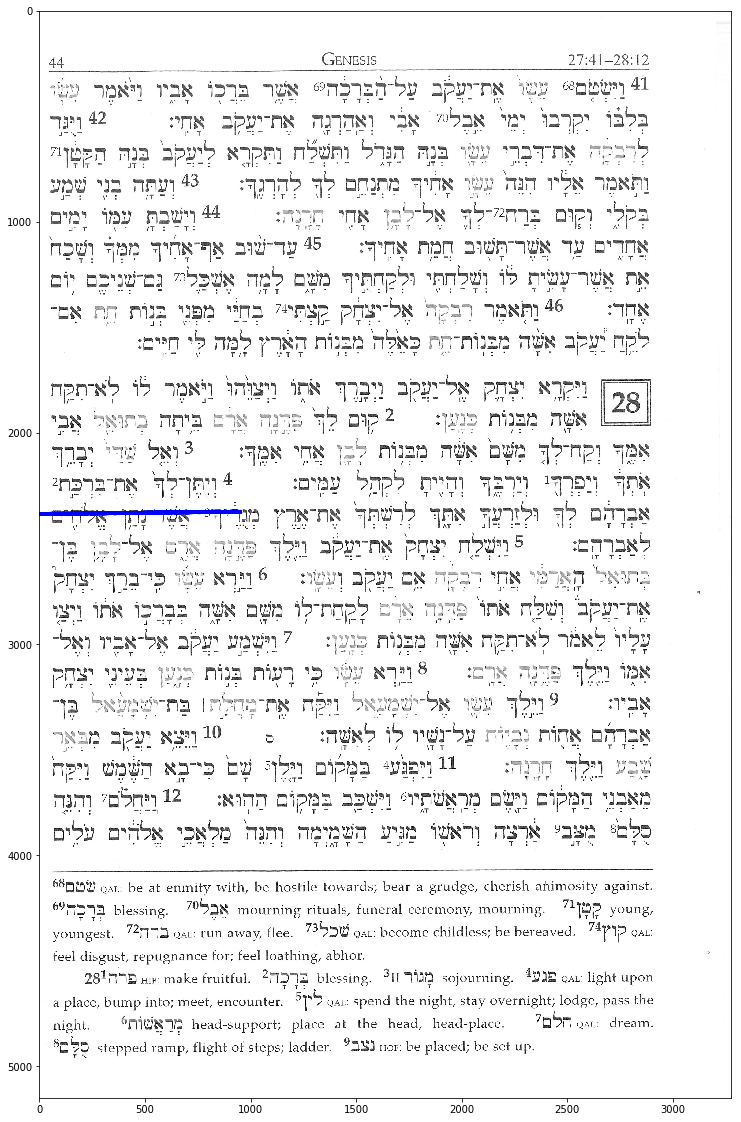

In [66]:
(h, w) = img.shape[:2]
angle = 1.5882496
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
plt.imshow(rotated)
plt.show()